## Sizedistribution data: 

- SMEARII: Ebas

In [2]:
from bs_fdbck.constants import path_measurement_data

 from pathlib import Path 
 Path(path).mkdir(exist_ok=True, parents=True)


In [8]:
import pandas as pd
import numpy as np
import xarray as xr

In [3]:
path_sizedist_ATTO = path_measurement_data /'ATTO'/'sizedistrib' 

In [4]:
path_sizedist_ATTO

PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/sizedistrib')

In [5]:
path_sizedist_ATTO.mkdir(parents=True, exist_ok=True)

In [6]:
!wget http://ftp.lfa.if.usp.br/ftp/public/LFA_Processed_Data/T0a_ATTO/Level3/SMPS_2014toNov2020_ATTO_60m_InstTower/ATTO-SMPS-clean_stp-transm-2014-202009_60m_correction_2021.dat -O /proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/sizedistrib/ATTO-SMPS-clean_stp-transm-2014-202009_60m_correction_2021.dat

--2022-07-06 11:47:07--  http://ftp.lfa.if.usp.br/ftp/public/LFA_Processed_Data/T0a_ATTO/Level3/SMPS_2014toNov2020_ATTO_60m_InstTower/ATTO-SMPS-clean_stp-transm-2014-202009_60m_correction_2021.dat
Resolving ftp.lfa.if.usp.br (ftp.lfa.if.usp.br)... 143.107.131.83
Connecting to ftp.lfa.if.usp.br (ftp.lfa.if.usp.br)|143.107.131.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 781454750 (745M)
Saving to: ‘/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/sizedistrib/ATTO-SMPS-clean_stp-transm-2014-202009_60m_correction_2021.dat’

100%[======================================>] 781,454,750 8.92MB/s   in 82s    

2022-07-06 11:48:31 (9.09 MB/s) - ‘/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/sizedistrib/ATTO-SMPS-clean_stp-transm-2014-202009_60m_correction_2021.dat’ saved [781454750/781454750]



In [7]:
fn_ATTO_sizedist = path_sizedist_ATTO /'ATTO-SMPS-clean_stp-transm-2014-202009_60m_correction_2021.dat'

In [9]:
df = pd.read_csv(fn_ATTO_sizedist,skiprows=0, delimiter='\t')# unpack=True)

In [10]:
df.head()


,Date,doy,dec.t,diam10.2,diam10.6,diam10.9,diam11.3,diam11.8,diam12.2,diam12.6,...,diam299.6,diam310.6,diam322,diam333.8,diam346,diam358.7,diam371.8,diam385.4,diam399.5,diam414.2
0,2014-02-13T12:05:00Z,44.503472,12.083333,0.00017,0.000167,36.772236,111.872388,0.000159,5.596831,34.268591,...,37.081460,55.540655,37.296145,55.478807,31.987473,38.797767,18.128456,4.803414,19.952010,7.590324
1,2014-02-13T12:10:00Z,44.506944,12.166667,0.00017,0.000167,32.547845,76.672842,11.001260,45.440317,68.831519,...,52.604867,69.676128,51.030337,29.511406,47.216077,20.415476,19.220917,23.589476,7.716148,3.768236
2,2014-02-13T12:15:00Z,44.510417,12.250000,0.00000,0.000167,0.000165,23.493256,0.876177,57.636903,0.000154,...,57.427684,47.869363,40.582374,33.826943,26.653582,15.603863,11.987820,19.971362,20.697194,8.421897
3,2014-02-13T12:20:00Z,44.513889,12.333333,0.00017,32.598122,0.000165,0.000162,135.837543,25.715926,2.603196,...,69.493880,43.248355,25.633249,33.986619,24.435075,24.590378,12.532251,19.105367,12.097595,0.000113
4,2014-02-13T12:25:00Z,44.517361,12.416667,0.00017,0.000167,0.000165,62.151601,122.822956,115.806010,58.129134,...,40.505976,67.284278,48.157611,36.172431,31.337511,40.276551,17.460585,8.450302,6.647190,0.000113


In [11]:
df['time'] = pd.to_datetime(df['Date'].apply(lambda x: x[:-1]))
df = df.set_index('time')

In [12]:
df.index

DatetimeIndex(['2014-02-13 12:05:00', '2014-02-13 12:10:00',
               '2014-02-13 12:15:00', '2014-02-13 12:20:00',
               '2014-02-13 12:25:00', '2014-02-13 12:30:00',
               '2014-02-13 12:35:00', '2014-02-13 12:40:00',
               '2014-02-13 12:45:00', '2014-02-13 12:50:00',
               ...
               '2020-09-30 23:11:31', '2020-09-30 23:16:31',
               '2020-09-30 23:21:31', '2020-09-30 23:26:31',
               '2020-09-30 23:31:31', '2020-09-30 23:36:31',
               '2020-09-30 23:41:31', '2020-09-30 23:46:31',
               '2020-09-30 23:51:31', '2020-09-30 23:56:31'],
              dtype='datetime64[ns]', name='time', length=426272, freq=None)

In [14]:
ds = df.to_xarray()

In [15]:
df.index

DatetimeIndex(['2014-02-13 12:05:00', '2014-02-13 12:10:00',
               '2014-02-13 12:15:00', '2014-02-13 12:20:00',
               '2014-02-13 12:25:00', '2014-02-13 12:30:00',
               '2014-02-13 12:35:00', '2014-02-13 12:40:00',
               '2014-02-13 12:45:00', '2014-02-13 12:50:00',
               ...
               '2020-09-30 23:11:31', '2020-09-30 23:16:31',
               '2020-09-30 23:21:31', '2020-09-30 23:26:31',
               '2020-09-30 23:31:31', '2020-09-30 23:36:31',
               '2020-09-30 23:41:31', '2020-09-30 23:46:31',
               '2020-09-30 23:51:31', '2020-09-30 23:56:31'],
              dtype='datetime64[ns]', name='time', length=426272, freq=None)

In [16]:
ds#['time'] = df.index

<xarray.Dataset>
Dimensions:    (time: 426272)
Coordinates:
  * time       (time) datetime64[ns] 2014-02-13T12:05:00 ... 2020-09-30T23:56:31
Data variables: (12/107)
    Date       (time) object '2014-02-13T12:05:00Z' ... '2020-09-30T23:56:31Z'
    doy        (time) float64 44.5 44.51 44.51 ... 2.466e+03 2.466e+03 2.466e+03
    dec.t      (time) float64 12.08 12.17 12.25 12.33 ... 23.78 23.86 23.94
    diam10.2   (time) float64 0.0001703 0.0001703 0.0 ... 0.0001718 0.0 0.0
    diam10.6   (time) float64 0.0001669 0.0001669 0.0001669 ... 6.995 0.0 3.53
    diam10.9   (time) float64 36.77 32.55 0.0001646 ... 0.0001662 0.0 0.0001661
    ...         ...
    diam346    (time) float64 31.99 47.22 26.65 24.44 ... 226.9 203.5 244.4
    diam358.7  (time) float64 38.8 20.42 15.6 24.59 ... 137.4 131.9 200.3 163.2
    diam371.8  (time) float64 18.13 19.22 11.99 12.53 ... 155.9 144.0 179.1
    diam385.4  (time) float64 4.803 23.59 19.97 19.11 ... 88.68 122.2 106.0
    diam399.5  (time) float64 19.95 7.716 20.7 12.1 ... 94.45 85.66 113.7 122.4
    diam414.2  (time) float64 7.59 3.768 8.422 0.0001126 ... 88.9 106.7 109.8

In [17]:
ds

<xarray.Dataset>
Dimensions:    (time: 426272)
Coordinates:
  * time       (time) datetime64[ns] 2014-02-13T12:05:00 ... 2020-09-30T23:56:31
Data variables: (12/107)
    Date       (time) object '2014-02-13T12:05:00Z' ... '2020-09-30T23:56:31Z'
    doy        (time) float64 44.5 44.51 44.51 ... 2.466e+03 2.466e+03 2.466e+03
    dec.t      (time) float64 12.08 12.17 12.25 12.33 ... 23.78 23.86 23.94
    diam10.2   (time) float64 0.0001703 0.0001703 0.0 ... 0.0001718 0.0 0.0
    diam10.6   (time) float64 0.0001669 0.0001669 0.0001669 ... 6.995 0.0 3.53
    diam10.9   (time) float64 36.77 32.55 0.0001646 ... 0.0001662 0.0 0.0001661
    ...         ...
    diam346    (time) float64 31.99 47.22 26.65 24.44 ... 226.9 203.5 244.4
    diam358.7  (time) float64 38.8 20.42 15.6 24.59 ... 137.4 131.9 200.3 163.2
    diam371.8  (time) float64 18.13 19.22 11.99 12.53 ... 155.9 144.0 179.1
    diam385.4  (time) float64 4.803 23.59 19.97 19.11 ... 88.68 122.2 106.0
    diam399.5  (time) float64 19.95 7.716 20.7 12.1 ... 94.45 85.66 113.7 122.4
    diam414.2  (time) float64 7.59 3.768 8.422 0.0001126 ... 88.9 106.7 109.8

In [18]:
col_dic ={
    d: float(d[4:]) for d in ds.data_vars if 'diam' in d
}

In [19]:
diameters = [ float(d[4:]) for d in ds.data_vars if 'diam' in d]

In [20]:
diameters.sort()

In [21]:
dsrn = ds.rename(col_dic)

In [22]:
dsrn.drop(diameters)

<xarray.Dataset>
Dimensions:  (time: 426272)
Coordinates:
  * time     (time) datetime64[ns] 2014-02-13T12:05:00 ... 2020-09-30T23:56:31
Data variables:
    Date     (time) object '2014-02-13T12:05:00Z' ... '2020-09-30T23:56:31Z'
    doy      (time) float64 44.5 44.51 44.51 ... 2.466e+03 2.466e+03 2.466e+03
    dec.t    (time) float64 12.08 12.17 12.25 12.33 ... 23.69 23.78 23.86 23.94

In [23]:
ds_out = dsrn[diameters].to_array(dim='diameter', name = 'dNdlog10D').to_dataset()

In [24]:
ds_out = xr.merge([dsrn.drop(diameters), ds_out])

In [25]:
ds_out['time']

<xarray.DataArray 'time' (time: 426272)>
array(['2014-02-13T12:05:00.000000000', '2014-02-13T12:10:00.000000000',
       '2014-02-13T12:15:00.000000000', ..., '2020-09-30T23:46:31.000000000',
       '2020-09-30T23:51:31.000000000', '2020-09-30T23:56:31.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2014-02-13T12:05:00 ... 2020-09-30T23:56:31

In [26]:
fn_ATTO_sizedist_out = fn_ATTO_sizedist.with_suffix('.nc')

In [27]:
ds_out.to_netcdf(fn_ATTO_sizedist_out)#fn_ATTO_sizedist.with_suffix('.nc'))

## Resample to 1 hour intervals: 

In [28]:
ds_out_rs = ds_out.resample(dict(time='1h')).mean()

In [29]:
fn_ATTO_sizedist_out.parent / f'{fn_ATTO_sizedist_out.stem}_resample1hour.nc'

PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/sizedistrib/ATTO-SMPS-clean_stp-transm-2014-202009_60m_correction_2021_resample1hour.nc')

In [46]:
fn_ATTO_sizedist_out_rs  = fn_ATTO_sizedist_out.parent / f'{fn_ATTO_sizedist_out.stem}_resample1hour.nc'

In [47]:
ds_out_rs.to_netcdf(fn_ATTO_sizedist_out_rs)

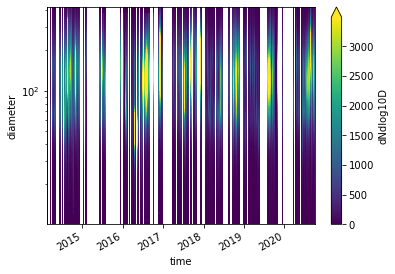

In [32]:
ds_out_rs['dNdlog10D'].plot(x='time', yscale='log', robust=True)

In [33]:
ds_out_rs

<xarray.Dataset>
Dimensions:    (time: 58116, diameter: 104)
Coordinates:
  * time       (time) datetime64[ns] 2014-02-13T12:00:00 ... 2020-09-30T23:00:00
  * diameter   (diameter) float64 10.2 10.6 10.9 11.3 ... 385.4 399.5 414.2
Data variables:
    doy        (time) float64 44.52 44.56 44.6 ... 2.466e+03 2.466e+03 2.466e+03
    dec.t      (time) float64 12.5 13.46 14.46 nan ... 20.48 21.48 22.48 23.48
    dNdlog10D  (time, diameter) float64 0.0001393 6.892 19.47 ... 112.1 94.93

In [34]:
fn_ATTO_sizedist_out_rs

PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/sizedistrib/ATTO-SMPS-clean_stp-transm-2014-202009_60m_correction_2021_resample30min.nc')

In [48]:
from bs_fdbck.util.EBAS_data import get_ebas_dataset_with_Nx,get_ATTO_sizedist_data, get_station_ebas_data

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/util/EBAS_data/__init__.py:203: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if station is 'ATTO':


In [38]:

%load_ext autoreload
%autoreload 2

In [49]:
ds_smr = get_station_ebas_data()

Importing files: 
[PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20120101000000.20181205100800.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20130101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20140101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20150101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20160101000000.2022022

In [50]:
ds_smr

<xarray.Dataset>
Dimensions:                                                  (metadata_time: 7, time: 61368, tbnds: 2, D: 51)
Coordinates:
  * metadata_time                                            (metadata_time) datetime64[ns] ...
  * time                                                     (time) datetime64[ns] ...
  * D                                                        (D) float64 3.16...
Dimensions without coordinates: tbnds
Data variables:
    time_bnds                                                (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                                       (time, metadata_time, tbnds) datetime64[ns] ...
    particle_number_size_distribution_amean                  (D, time) float64 ...
    particle_number_size_distribution_amean_qc               (D, time) float64 ...
    particle_number_size_distribution_amean_ebasmetadata     (time, D, metadata_time) object ...
    particle_number_size_distribution_prec1587               (D, time) float64 ...
    particle_number_size_distribution_prec1587_qc            (D, time) float64 ...
    particle_number_size_distribution_prec1587_ebasmetadata  (time, D, metadata_time) object ...
    particle_number_size_distribution_perc8413               (D, time) float64 ...
    particle_number_size_distribution_perc8413_qc            (D, time) float64 ...
    particle_number_size_distribution_perc8413_ebasmetadata  (time, D, metadata_time) object ...
Attributes: (12/77)
    Conventions:                   CF-1.8, ACDD-1.3
    featureType:                   timeSeries
    title:                         Ground based in situ observations of parti...
    keywords:                      particle_number_size_distribution, GAW-WDC...
    id:                            FI0050R.20120101000000.20181205100800.dmps...
    naming_authority:              no.nilu.ebas
    ...                            ...
    ebas_method_ref:               FI03L__TRY_TDMPS
    ebas_organization:             FI03L, University of Helsinki, UHEL, Insti...
    ebas_framework_acronym:        ACTRIS, EMEP, GAW-WDCA
    ebas_originator:               Kulmala, Markku, , , , , , , , , 
    ebas_submitter:                Aalto, Pasi, , , , , , , , , 
    ebas_metadata:                 {\n    "Data definition": "EBAS_1.1",\n   ...

In [44]:
ds = get_ATTO_sizedist_data()

Importing file: 
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/sizedistrib/ATTO-SMPS-clean_stp-transm-2014-202009_60m_correction_2021_resample30min.nc


In [44]:
ds = get_ATTO_sizedist_data()

Importing file: 
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/sizedistrib/ATTO-SMPS-clean_stp-transm-2014-202009_60m_correction_2021_resample30min.nc


In [51]:
rn_dic = dict(diameter='D', 
              dNdlog10D='particle_number_size_distribution_amean',
              
             )

In [56]:
ds = ds.rename(rn_dic)

In [57]:
ds.transpose("D", "time")

<xarray.Dataset>
Dimensions:                                  (time: 58116, D: 104)
Coordinates:
  * time                                     (time) datetime64[ns] 2014-02-13...
  * D                                        (D) float64 10.2 10.6 ... 414.2
Data variables:
    doy                                      (time) float64 44.52 ... 2.466e+03
    dec.t                                    (time) float64 12.5 13.46 ... 23.48
    particle_number_size_distribution_amean  (D, time) float64 0.0001393 ... ...

In [59]:

ds_nx =  get_ebas_dataset_with_Nx(station='ATTO')

Importing file: 
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/sizedistrib/ATTO-SMPS-clean_stp-transm-2014-202009_60m_correction_2021_resample1hour.nc
(59, 58116)
2758.500959764544 2772.5960438985244
1830.1767044972194 1836.9936189673194
orig, xarray integrate (trapezoidal), constant dlogD, trap2:
867.7182736858473 863.5935276985072 1836.9936189673194 1830.1767044972194
1.004776258569622 1.0 2.1271507486432206
(46, 58116)
2226.2181836099517 2254.6640271779593
1681.711615866255 1690.6378245433775
orig, xarray integrate (trapezoidal), constant dlogD, trap2:
706.967553578824 698.360460491455 1690.6378245433775 1681.711615866255
1.0123247142046272 1.0 2.4208670452986847
(39, 58116)
1819.2845624724687 1855.1545975009196
1575.5375674276613 1589.1444849487668
orig, xarray integrate (trapezoidal), constant dlogD, trap2:
594.0311437981901 583.2059847622502 1589.1444849487668 1575.5375674276613
1.018561467678273 1.0 2.724842553864734
(28, 58116)
980.8038298203078 1020.4847497233324
1202

In [72]:
import matplotlib.pyplot as plt

In [77]:
ds_nx['N50-100'] = ds_nx['N50']-ds_nx['N100']
ds_nx['N100-200'] = ds_nx['N100']-ds_nx['N200']



<AxesSubplot:xlabel='time'>

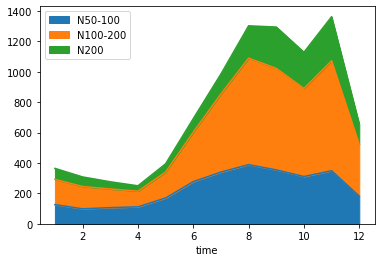

In [102]:
_df = ds_nx[['N50-100','N100-200','N200']].to_dataframe()
_df.groupby(_df.index.month).median().plot(kind='area', stacked='true',)#, alpha=.2)




(5, 10000.0)

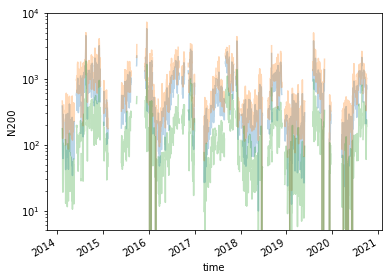

In [76]:
ds_nx['N100'].resample(time='D').median().plot(alpha=.3)
ds_nx['N50'].resample(time='D').median().plot(alpha=.3)
ds_nx['N200'].resample(time='D').median().plot(alpha=.3)
plt.yscale('log')
plt.ylim([5,1e4])